In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr
from scipy.stats import ttest_ind

In [5]:
#df = pd.read_csv('/content/Food data.csv') # load file locally.

#load file from github
url = 'https://raw.githubusercontent.com/ahsanb6/Food-Service-EDA/main/Data/Food%20data.csv'
df = pd.read_csv(url)

1st we explore the data with basic
df.head()
df.info()
df.shape
df.describe


In [7]:
df.head()

,ID,date,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,staff_experience,waste_category
0,0,12/19/2022,196.0,13,27.887273,45.362854,0,0,7.740587,intermediate,dairy
1,1,11/21/2023,244.0,15,10.317872,64.430475,1,0,42.311779,NaN,MeAt
2,2,2/1/2022,148.0,16,27.714300,69.046113,1,0,41.184305,Beginner,MeAt
3,3,3/19/2023,157.0,19,19.173902,46.292823,6,0,41.543492,Beginner,MeAt
4,4,7/18/2022,297.0,10,26.375233,79.741064,0,0,26.525097,Intermediate,MEAT


In [ ]:
df.columns

Index(['ID', 'date', 'meals_served', 'kitchen_staff', 'temperature_C',
       'humidity_percent', 'day_of_week', 'special_event', 'past_waste_kg',
       'staff_experience', 'waste_category'],
      dtype='object')

In [ ]:
df.shape

(1822, 11)

In [ ]:
df.describe()

,ID,meals_served,temperature_C,humidity_percent,day_of_week,past_waste_kg
count,1822.000000,1790.000000,1822.000000,1806.000000,1822.00000,1806.000000
mean,910.500000,373.512849,22.189280,60.791257,3.01427,26.997534
std,526.110413,494.791973,8.919939,17.326232,2.00899,12.791891
min,0.000000,100.000000,-10.372207,30.121111,0.00000,5.008394
25%,455.250000,211.250000,15.684259,46.035158,1.00000,15.990760
50%,910.500000,306.000000,22.115040,61.634935,3.00000,26.832569
75%,1365.750000,407.000000,28.807494,75.789317,5.00000,38.116308
max,1821.000000,4730.000000,60.000000,89.982828,6.00000,49.803703


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1822 entries, 0 to 1821
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1822 non-null   int64  
 1   date              1822 non-null   object 
 2   meals_served      1790 non-null   float64
 3   kitchen_staff     1804 non-null   object 
 4   temperature_C     1822 non-null   float64
 5   humidity_percent  1806 non-null   float64
 6   day_of_week       1822 non-null   int64  
 7   special_event     1822 non-null   object 
 8   past_waste_kg     1806 non-null   float64
 9   staff_experience  1485 non-null   object 
 10  waste_category    1801 non-null   object 
dtypes: float64(4), int64(2), object(5)
memory usage: 156.7+ KB


In [ ]:
# Before start analyses we set the data type if any issue.
#we change the kitchen_staff id to int becauese it cannot be a object
#but before changing we check inconsistency of data.
print(df['kitchen_staff'].unique())

['13' '15' '16' '19' '10' '18' '7' '5' '12' '8' '17' '11' '9' '6' nan '14'
 'ten ' 'eleven']


In [ ]:
# kitchen_staff data is inconsistent it is using ten eleven instead of 10, 11 we replace it 1st with values.
df['kitchen_staff'] = df['kitchen_staff'].replace({'ten ': 10, 'eleven': 11})

In [ ]:
#convert kitchen_staff into integer
# Step 1: Convert all values to numeric, invalid entries will become NaN
df['kitchen_staff'] = pd.to_numeric(df['kitchen_staff'], errors='coerce')

# Step 2: Convert the column to nullable integer type (Int64) to handle NaN values
df['kitchen_staff'] = df['kitchen_staff'].astype('Int64')

In [ ]:
# Convert special_event also into int because it is binary value 0 or 1
print(df['special_event'].unique())

['0' '1' 'One ']


In [ ]:
# Step 1: Replace 'One ' with 1
df['special_event'] = df['special_event'].replace({'One ': 1})

# Step 2: Convert the column to integer type
df['special_event'] = df['special_event'].astype(int)

To handel missing values we check the missing value and draw a shape how to handel it.

In [ ]:
df.isnull().sum()/len(df)*100

,0
ID,0.000000
date,0.000000
meals_served,1.756312
kitchen_staff,0.987925
temperature_C,0.000000
humidity_percent,0.878156
day_of_week,0.000000
special_event,0.000000
past_waste_kg,0.878156
staff_experience,18.496158


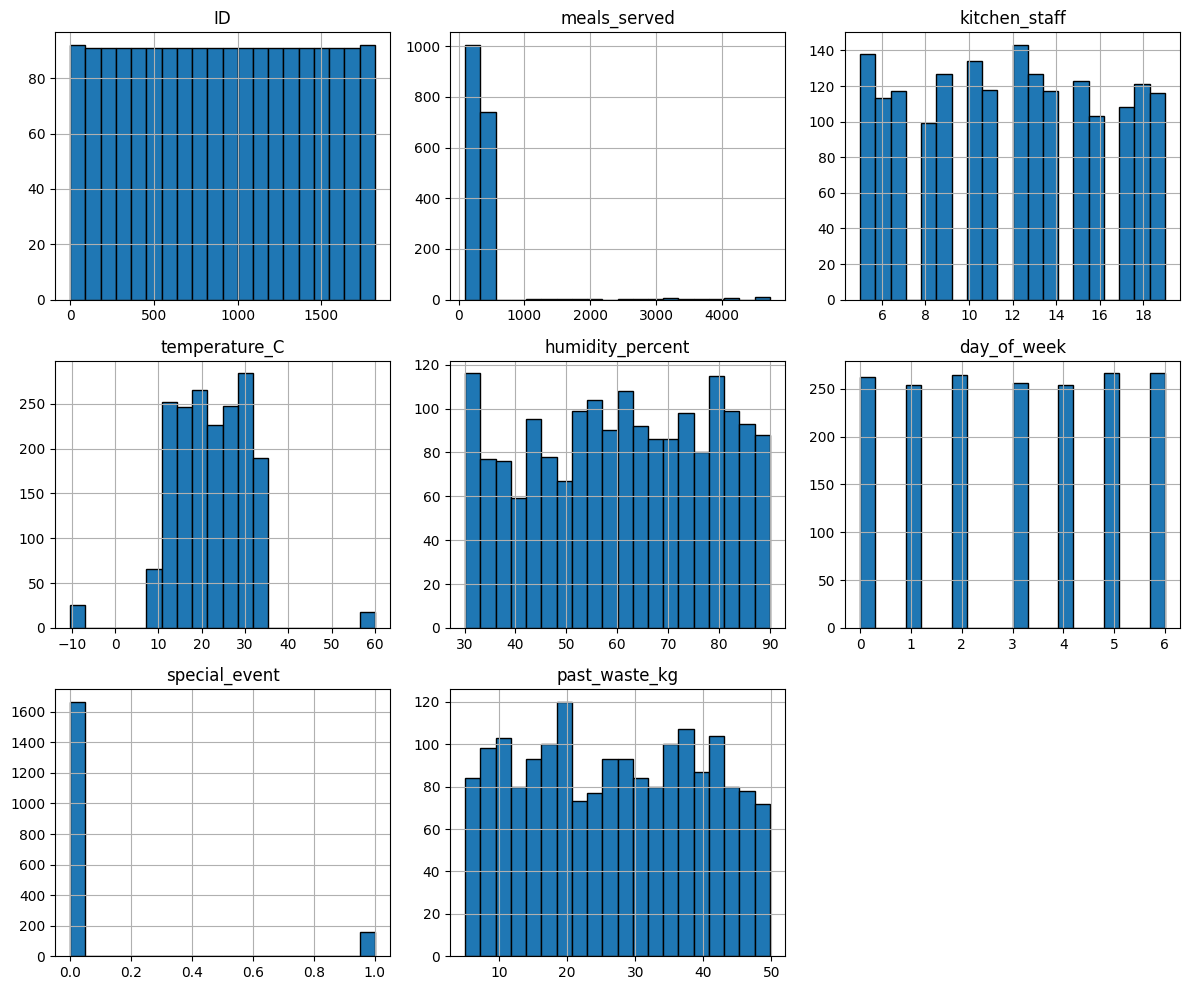

In [ ]:
# draw histogram of numeric columns to check data and take step of to impute by mean and median

df.hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.tight_layout()
plt.show()

In [ ]:
# ist we deal missing values of numeric values
df["meals_served"] = df["meals_served"].fillna(df["meals_served"].median()) # because data is skewed we use median
df["kitchen_staff"] = df["kitchen_staff"].fillna(df["kitchen_staff"].median()) # because the no of employee cannot be in point values.
df["humidity_percent"] = df["humidity_percent"].fillna(df["humidity_percent"].mean()) # data is normal that why we use mean
df["past_waste_kg"] = df["past_waste_kg"].fillna(df["past_waste_kg"].mean())

In [ ]:
#Removing missing values in non numeric data.
df["staff_experience"] = df["staff_experience"].fillna("Unknown Staff") # more than 18% data is missing so why we create new category for that.
df["waste_category"] = df["waste_category"].fillna(df["waste_category"].mode()[0]) #only 1.15% data is missing so we replace with mode.

In [ ]:
#Handel data data type
df["date"] = pd.to_datetime(df["date"])

In [ ]:
df.isnull().sum()/len(df)*100

,0
ID,0.0
date,0.0
meals_served,0.0
kitchen_staff,0.0
temperature_C,0.0
humidity_percent,0.0
day_of_week,0.0
special_event,0.0
past_waste_kg,0.0
staff_experience,0.0


In [ ]:
#Check duplicates and remove them
df.duplicated().sum() # no duplicate exist.
#df.drop_duplicates()

np.int64(0)

In [ ]:
# 2.1 Summary statistics
summary_stats = df.select_dtypes(include='number').agg(['mean', 'median', 'std', 'min', 'max'])
print(summary_stats)

                 ID  meals_served  kitchen_staff  temperature_C  \
mean     910.500000    372.327113      11.905598      22.189280   
median   910.500000    306.000000      12.000000      22.115040   
std      526.110413    490.505492       4.270492       8.919939   
min        0.000000    100.000000       5.000000     -10.372207   
max     1821.000000   4730.000000      19.000000      60.000000   

        humidity_percent  day_of_week  special_event  past_waste_kg  
mean           60.791257      3.01427       0.085620      26.997534  
median         61.514385      3.00000       0.000000      26.997534  
std            17.249947      2.00899       0.279879      12.735569  
min            30.121111      0.00000       0.000000       5.008394  
max            89.982828      6.00000       1.000000      49.803703  


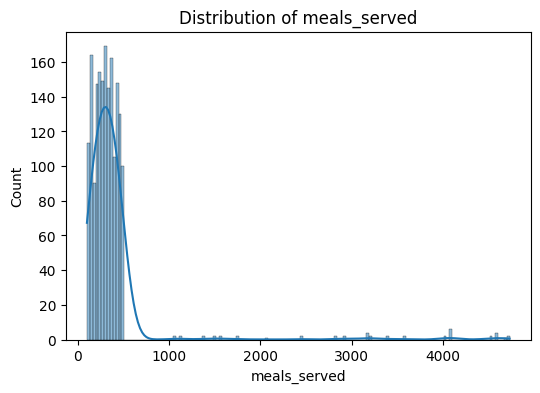

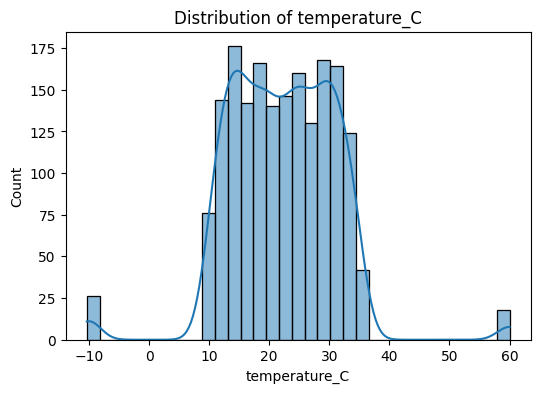

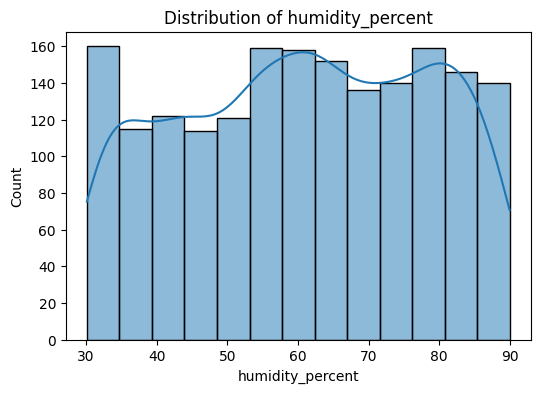

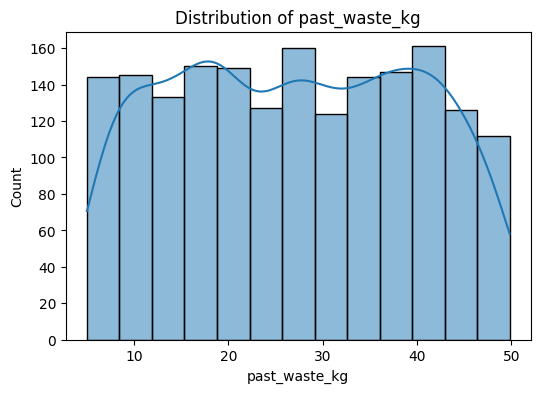

In [ ]:
# 2.2 Visual Distribuation
numerical_cols = ["meals_served", "temperature_C", "humidity_percent", "past_waste_kg"]
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

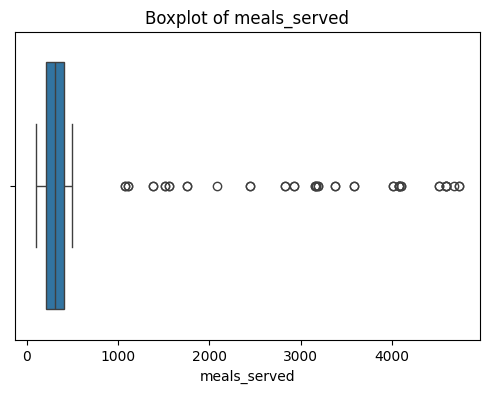

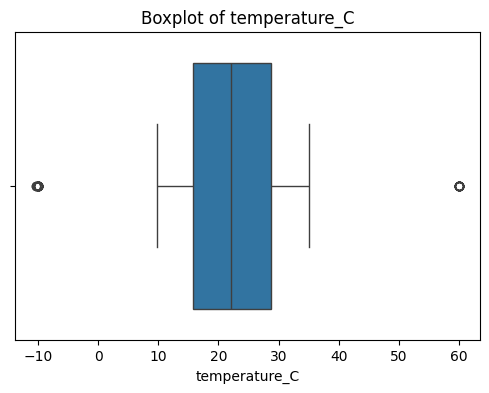

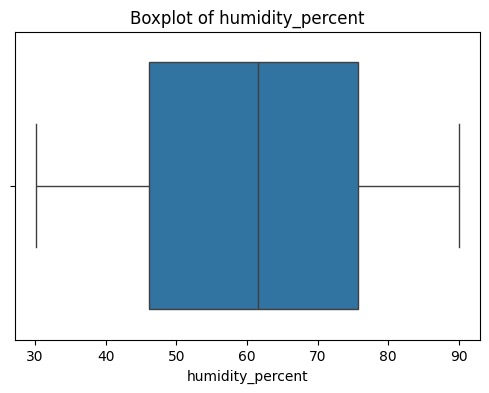

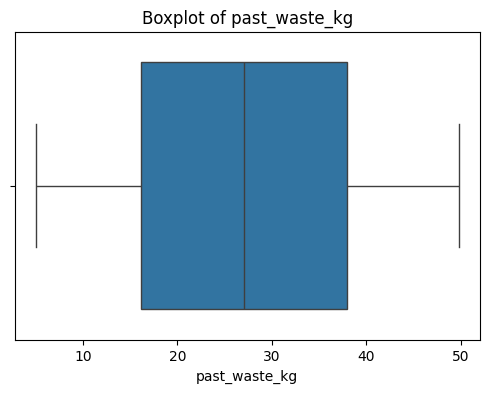

In [ ]:
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [ ]:
Q1 = df['meals_served'].quantile(0.25)
Q3 = df['meals_served'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper bound for outliers
upper_bound = Q3 + 1.5 * IQR

# Count the number of values above the upper bound (outliers)
outlier_count = len(df[df['meals_served'] > upper_bound])

# Print the result
print(f"Number of outliers in meals_served: {outlier_count}")
print(f"Upper bound for outliers: {upper_bound}")
print(f"Outlier values: {df[df['meals_served'] > upper_bound]['meals_served'].values}")

Number of outliers in meals_served: 46
Upper bound for outliers: 696.0
Outlier values: [1560. 1110. 2930. 3160. 1510. 1380. 2440. 3538. 1070. 3190. 3538. 3538.
 1750. 3538. 3538. 3538. 3170. 3538. 2830. 3380. 3538. 3538. 3538. 1560.
 1110. 2930. 3160. 1510. 1380. 2440. 3538. 2080. 1070. 3190. 3538. 1750.
 3538. 3538. 3538. 3170. 3538. 2830. 3380. 3538. 3538. 3538.]


In [ ]:
# cap value of meal served on upper bound
Q1 = df['meals_served'].quantile(0.25)
Q3 = df['meals_served'].quantile(0.75)

# Step 2: Compute IQR
IQR = Q3 - Q1

# Step 3: Define upper bound
upper_bound = Q3 + 1.5 * IQR
print(f"IQR-based upper bound: {upper_bound}")

# Step 4: Cap values at the upper bound
df['meals_served'] = df['meals_served'].clip(upper=upper_bound)

# Step 5: Verify how many values still exceed the upper bound
outliers_remaining = (df['meals_served'] > upper_bound).sum()
print(f"Values above the upper bound after capping: {outliers_remaining}")

IQR-based upper bound: 696.0
Values above the upper bound after capping: 0


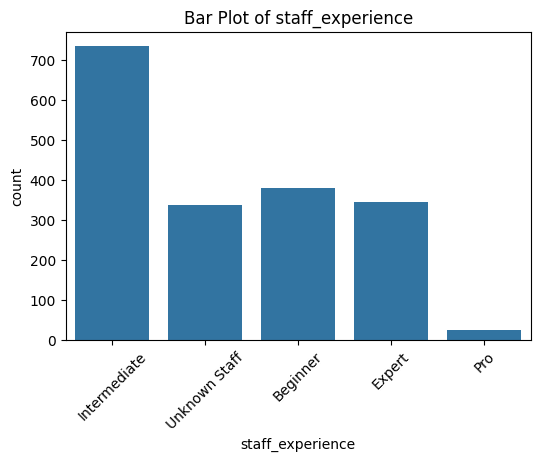

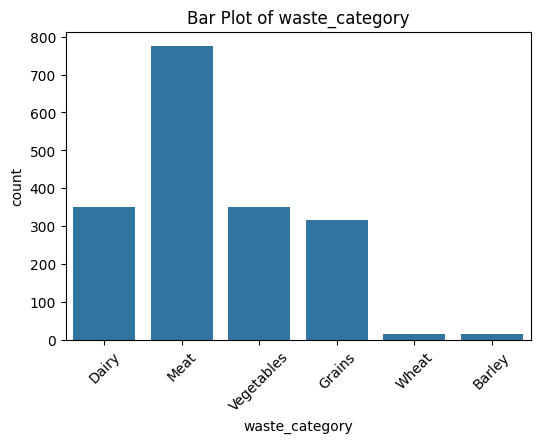

In [ ]:
# bar plot for Categorical columns
# inconsistency in title adjust it.
df['staff_experience'] = df['staff_experience'].str.strip().str.title()
df['waste_category'] = df['waste_category'].str.strip().str.title()
cat_cols = ["staff_experience", "waste_category"]
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=df[col])
    plt.title(f'Bar Plot of {col}')
    plt.xticks(rotation=45)
    plt.show()

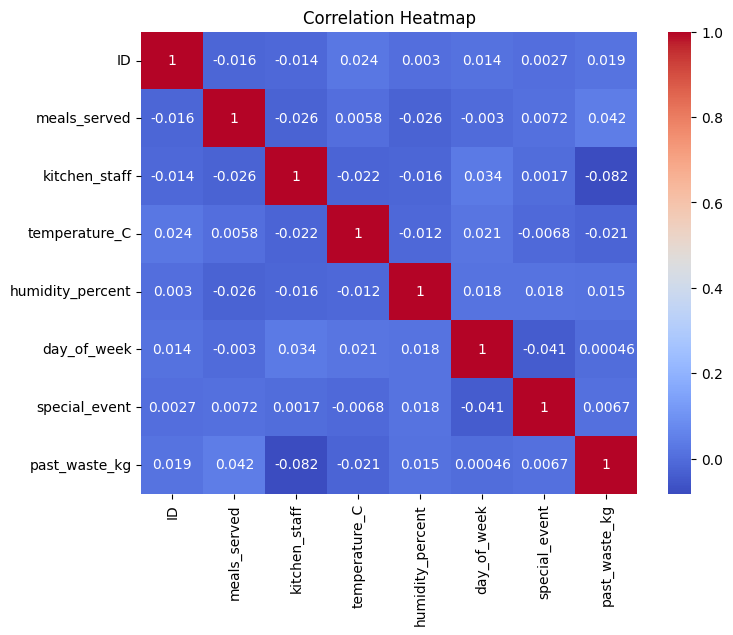

In [ ]:
# 2.3 correlation analysis:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()
# Result shows
# no strong relationship between any 2
#weak negative correlation between the number of meals served and the amount of food waste, with a correlation coefficient of -0.064.
# very weak negative correlation between temperature and food waste, with a coefficient of -0.021.

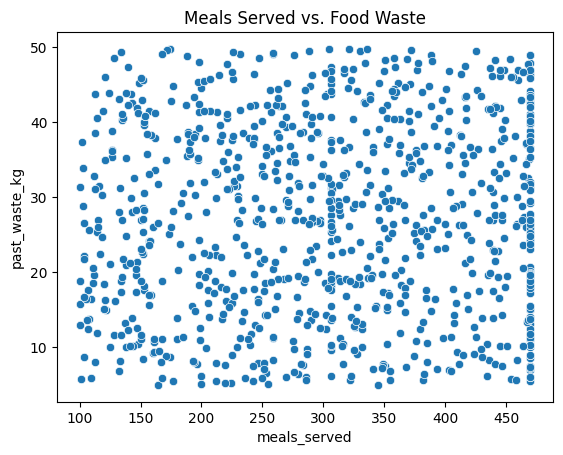

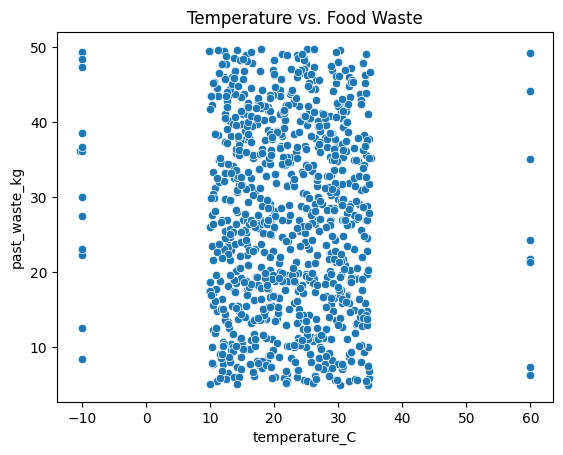

In [ ]:
# for further analyses relationship we use scatter plot
sns.scatterplot(x='meals_served', y='past_waste_kg', data=df)
plt.title('Meals Served vs. Food Waste')
plt.show()

sns.scatterplot(x='temperature_C', y='past_waste_kg', data=df)
plt.title('Temperature vs. Food Waste')
plt.show()


In [ ]:
#Scatter plot also show no significat relationship
#for further exploration we test p value to show relationship

correlation, p_value = pearsonr(df["meals_served"], df["past_waste_kg"])
print("Correlation:", correlation, "P-value:", p_value)
correlation, p_value = pearsonr(df["temperature_C"], df["past_waste_kg"])
print("Correlation:", correlation, "P-value:", p_value)
# Result shows
#Heat map show week relationship but p value is sligter greater than 0.05 so significant relationship in meal served and food waste
#In temperature and food waste p value is singificant so there is no relationship between them.

Correlation: 0.0416946686798606 P-value: 0.07519308743006167
Correlation: -0.021394118445094264 P-value: 0.3614090888202666


In [ ]:
# Hypothesis Testing:
# 3.1 Impact of kitchen staff on food waste
correlation, p_value = pearsonr(df["kitchen_staff"], df["past_waste_kg"])
print("Correlation:", correlation, "P-value:", p_value)
# result show week negative relation. and P value is less than significant value that is 0.05
#Therefore, we reject the null hypothesis (H0)
#There is a statistically significant linear relationship between the number of kitchen staff and food waste.

Correlation: -0.08224423315791399 P-value: 0.00044119432802296166


In [ ]:
# 3.2 Special event and foot waste

event_waste = df[df["special_event"] == 1]["past_waste_kg"]
non_event_waste = df[df["special_event"] == 0]["past_waste_kg"]

t_stat, p_val = ttest_ind(event_waste, non_event_waste)
print("T-statistic:", t_stat, "P-value:", p_val)
# Resul shows that P value is great than 0.05 so we cannot reject null hypothesis
#no significant difference in food waste

T-statistic: 0.2842011944693211 P-value: 0.7762885295053542
